### Anatomical Similarity Comparison

The goal of this analysis is to check whether the increased ISC - in total or in part - could be driven by anatomical similarities. The reason for this is that twins also 'look alike', and their brains look alike (need to find some literature on that). Thus, normalization etc. should also be better for twins compared to non-twins. Given that we are operating at the level of regions (parcellation), the influence of microstructural differences should not matter that much, but it is still a potential confound we need to take serious.

#### Import modules

In [4]:
import pandas as pd
import os, itertools, random
import numpy as np
from nilearn.masking import compute_brain_mask
from nilearn import image
from nilearn.masking import apply_mask 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from timeit import default_timer as timer

In [5]:
twin_df = pd.read_csv('../data/00_dataset_info/twin_df.csv')

twin_list = twin_df[['twin_A_id','twin_B_id']].values.tolist()
print(twin_list[:3])

twin_df.head()

[['sub-0001', 'sub-0018'], ['sub-0003', 'sub-0233'], ['sub-0004', 'sub-0420']]


,Unnamed: 0,family_id,twin_A_id,twin_A_age,twin_A_sex,twin_B_id,twin_B_age,twin_B_sex
0,0,fam-0001,sub-0001,14.0,M,sub-0018,14.0,M
1,1,fam-0116,sub-0003,14.0,M,sub-0233,14.0,F
2,2,fam-0002,sub-0004,11.0,M,sub-0420,11.0,M
3,3,fam-0088,sub-0005,12.0,F,sub-0178,12.0,F
4,4,fam-0178,sub-0006,15.0,M,sub-0329,15.0,F


In [6]:
n_twins   = len(twin_list)

#iscs_reg_twin   = np.zeros((n_twins))
#iscs_reg_notwin = np.zeros(( 2 * n_twins))

start = timer()

twin_iscs         = []
no_twin_iscs      = []

for twin_pair in twin_list:
    
    
    file_a = twin_pair[0]
    file_b = twin_pair[1] 
    print(file_a)
    print(file_b)
    #print('---')
    
    f1 = '../data/04_anatomy/' + file_a + '_ses-02_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'
    f1m = '../data/04_anatomy/' + file_a + '_ses-02_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
    f1_masked = apply_mask(f1, compute_brain_mask(f1m, threshold=0.01, mask_type='whole-brain'))

    f2 = '../data/04_anatomy/' + file_b + '_ses-02_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'
    f2m = '../data/04_anatomy/' + file_b + '_ses-02_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
    f2_masked = apply_mask(f2, compute_brain_mask(f2m, threshold=0.01, mask_type='whole-brain'))

    #print(f1_masked.shape)
    #print(f2_masked.shape)
    
    
    #print(np.corrcoef(f1_masked, f2_masked)[0,1])
    
    
    twin_iscs.append(np.corrcoef(f1_masked, f2_masked)[0,1])

    
    # now, do the same for a non-twin pair
    all_subs = list(itertools.chain(*twin_list))

    
    #from the remaining people, randomly chose one
    other_people = [x for x in all_subs if x != twin_pair[0]]  #exclude the current ones to avoid biasing the results
    file_b_control =  random.choice(other_people)
    #print('random other: ' + file_b_control)
    
    f2_control  = '../data/04_anatomy/' + file_b_control + '_ses-02_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'
    f2m_control = '../data/04_anatomy/' + file_b_control + '_ses-02_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
    f2_masked_control = apply_mask(f2_control, compute_brain_mask(f2m_control, threshold=0.01, mask_type='whole-brain'))

    #print(np.corrcoef(f1_masked, f2_masked_control)[0,1])
    no_twin_iscs.append(np.corrcoef(f1_masked, f2_masked_control)[0,1])
    

    #also for the other twin -- again to avoid biasing 
    other_people = [x for x in all_subs if x != twin_pair[1]]  #exclude the current ones to avoid biasing the results
    file_a_control =  random.choice(other_people)
    #print('random other: ' + file_a_control)
    
    f1_control  = '../data/04_anatomy/' + file_a_control + '_ses-02_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'
    f1m_control = '../data/04_anatomy/' + file_a_control + '_ses-02_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
    f1_masked_control = apply_mask(f1_control, compute_brain_mask(f1m_control, threshold=0.01, mask_type='whole-brain'))

    #print(np.corrcoef(f1_masked_control, f2_masked)[0,1])
    no_twin_iscs.append(np.corrcoef(f1_masked_control, f2_masked)[0,1])
    
    #print('done')
    end = timer()
    print(end - start)


sub-0001
sub-0018
33.680979404999995
sub-0003
sub-0233
66.738618075
sub-0004
sub-0420
100.253194041
sub-0005
sub-0178
135.31045243199998
sub-0006
sub-0329
168.773995593
sub-0007
sub-0048
208.92415670399998
sub-0010
sub-0036
246.492501538
sub-0013
sub-0261
282.386071877
sub-0015
sub-0171
317.702568848
sub-0016
sub-0183
353.90067957
sub-0017
sub-0059
389.63191938800003
sub-0001
sub-0018
425.025347174
sub-0019
sub-0213
460.087837341
sub-0020
sub-0310
496.25102082600006
sub-0021
sub-0372
531.854800996
sub-0024
sub-0073
567.897286331
sub-0028
sub-0408
602.343293825
sub-0031
sub-0161
638.505785255
sub-0032
sub-0223
674.876307764
sub-0010
sub-0036
710.12483769
sub-0037
sub-0078
745.9100741020001
sub-0038
sub-0272
780.510444645
sub-0041
sub-0292
816.291302509
sub-0042
sub-0182
852.451330607
sub-0043
sub-0279
888.154846097
sub-0047
sub-0188
923.21935017
sub-0007
sub-0048
957.94527608
sub-0049
sub-0170
993.541289675
sub-0050
sub-0284
1029.488390136
sub-0051
sub-0086
1064.834038196
sub-0053
sub-0

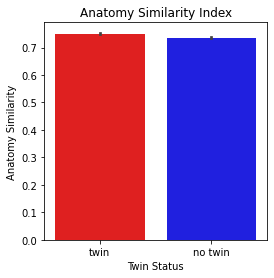

In [8]:
df1 = pd.DataFrame(np.vstack(( no_twin_iscs, 
                   len(no_twin_iscs) * ['no twin'] )).T, 
                   columns = ['Anatomy Similarity','Twin Status'])

df2 = pd.DataFrame(np.vstack(( twin_iscs, 
                   len(twin_iscs) * ['twin'] )).T, 
                   columns = ['Anatomy Similarity','Twin Status'])
result_df = pd.concat([df2, df1])
del df1, df2
result_df['Anatomy Similarity'] = result_df['Anatomy Similarity'].astype('float')
#result_df.head()

plt.figure(figsize =  (4,4))
sns.barplot(data=result_df, 
            x="Twin Status", 
            y="Anatomy Similarity",
            palette = [ 'red', 'blue']).set(title='Anatomy Similarity Index');


In [11]:
result_df.to_csv('../data/05_results/anatomy_similarity_df.csv')